In [10]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
data = pd.read_csv('data\\bank.csv')

numeric_feats = data.dtypes[data.dtypes != "object"].index
numeric_data = data[numeric_feats]

del numeric_data['duration']

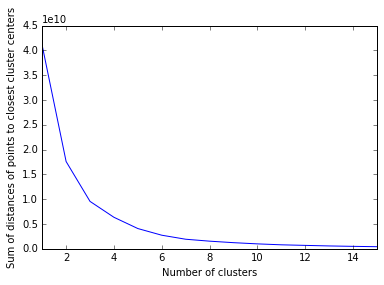

In [47]:
sum_of_distances = {}
for num_clusters in range(1,16):
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, random_state=1)
    kmeans.fit(numeric_data)
    sum_of_distances[num_clusters] = kmeans.inertia_
Series(sum_of_distances).sort_index().plot()
xlabel('Number of clusters')
ylabel('Sum of distances of points to closest cluster centers')

In [56]:
k_means = KMeans(init='k-means++', n_clusters=4)
k_means.fit(numeric_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [57]:
scatter(numeric_data[:,0], numeric_data[:,1], c=k_means.labels_, cmap='gist_ncar')
scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], marker="x", s=200, linewidths=5)

TypeError: unhashable type